# DATOS

## LIMPIEZA Y DESCRIPCION DE LA BASE

In [53]:
#pip install geopandas plotly
#!pip3 install pygwalker
#!pip3 install plotly
#!pip3 install cuffliks
!pip3 install nbformat==4.2.0



Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 674.0 kB/s eta 0:00:00a 0:00:01
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.9.2
    Uninstalling nbformat-5.9.2:
      Successfully uninstalled nbformat-5.9.2


In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import chart_studio.plotly as py
import numpy as np
import pygwalker as pyg
import cufflinks as cf
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
df = pd.read_csv(
'/Users/daab/Desktop/CarpetaFinal/unidaddatos.csv', sep=',', decimal=',')
print(df.head())

   RADICADO  ID_SINIESTRO  PROGRAMA  IDEN_PERSONA  PARAM_HECHO  \
0    343197         81719         4        974552            5   
1    533837       1321356         4        787775            5   
2    365621        205864         4       1361997            5   
3    334660         37573         4        727135            5   
4    606566       2067119         4        181692           12   

                               Hecho_vic F_OCURRENCIA_HECHO  DANE_OCURRENCIA  \
0                 Desplazamiento forzado  06/19/00 00:00:00             5284   
1                 Desplazamiento forzado  12/05/97 00:00:00             5361   
2                 Desplazamiento forzado  01/25/01 00:00:00             5756   
3                 Desplazamiento forzado  01/21/93 00:00:00             5842   
4  Perdida de Bienes Muebles o Inmuebles  05/15/16 00:00:00             5250   

  Departamento_ocurrencia Municipio_ocurrencia  ... DANE_DECLA  \
0               Antioquia             Frontino  ...     

In [3]:
key = pd.read_excel(
'/Users/daab/Desktop/CarpetaFinal/MunicipiosDANEObjeto.xlsx')
print(key.head())

   DANE
0  1001
1  5000
2  5045
3  5147
4  5172


In [4]:
df.count()

RADICADO                    2797122
ID_SINIESTRO                2797122
PROGRAMA                    2797122
IDEN_PERSONA                2797122
PARAM_HECHO                 2797122
Hecho_vic                   2797122
F_OCURRENCIA_HECHO          2797122
DANE_OCURRENCIA             2797122
Departamento_ocurrencia     2797122
Municipio_ocurrencia        2797122
F_REPORTE_HECHO             2797115
DANE_DECLA                  2796582
Departamento_declaracion    2796582
Municipio_declaracion       2796582
TIPO_DESPLAZAMIENTO         2769708
PRESUENTO_RESPONSABLE       2797091
TIPO_VICTIMA                2797122
GENERO_HOM                  2797122
DISCAP                      2797122
CICLO_VITAL                 2797122
PERT_ETNICA                 2797122
dtype: int64

In [52]:
df['SUMA'] = 1

In [5]:
df.Municipio_ocurrencia.nunique()

156

In [6]:
df['F_OCURRENCIA_HECHO']= pd.to_datetime(df['F_OCURRENCIA_HECHO'])


/var/folders/jv/skr8nw317yl8mp43lhp665y80000gn/T/ipykernel_3070/1811544501.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [7]:
df['F_REPORTE_HECHO'] = df['F_REPORTE_HECHO'].replace('01/00/00 00:00:00', '01/01/70 00:00:00')

In [8]:
df['F_REPORTE_HECHO']= pd.to_datetime(df['F_REPORTE_HECHO'])


/var/folders/jv/skr8nw317yl8mp43lhp665y80000gn/T/ipykernel_3070/3584519447.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [9]:
df.dtypes

RADICADO                             int64
ID_SINIESTRO                         int64
PROGRAMA                             int64
IDEN_PERSONA                         int64
PARAM_HECHO                          int64
Hecho_vic                           object
F_OCURRENCIA_HECHO          datetime64[ns]
DANE_OCURRENCIA                      int64
Departamento_ocurrencia             object
Municipio_ocurrencia                object
F_REPORTE_HECHO             datetime64[ns]
DANE_DECLA                         float64
Departamento_declaracion            object
Municipio_declaracion               object
TIPO_DESPLAZAMIENTO                 object
PRESUENTO_RESPONSABLE               object
TIPO_VICTIMA                        object
GENERO_HOM                          object
DISCAP                               int64
CICLO_VITAL                         object
PERT_ETNICA                         object
dtype: object

In [10]:
df = df.query('TIPO_VICTIMA == "DIRECTA"')

In [11]:
df['ANIODECLA'] = pd.to_datetime(df['F_REPORTE_HECHO']).dt.year

In [12]:
df['ANIO'] = pd.to_datetime(df['F_OCURRENCIA_HECHO']).dt.year

## CREACION DE TABLAS POR HECHO VICTIMIZANTE

In [13]:
dfanio = df.groupby(['ANIO']).agg({'IDEN_PERSONA': 'count'}).reset_index()

In [14]:
dfgen = df.groupby(['GENERO_HOM']).agg({'IDEN_PERSONA': 'count'}).reset_index()

In [15]:
dfhv = df.groupby(['Hecho_vic']).agg({'IDEN_PERSONA': 'count'}).reset_index()

In [16]:
dfpr = df.groupby(['PRESUENTO_RESPONSABLE']).agg({'IDEN_PERSONA': 'count'}).reset_index()

In [38]:
dfmo = df.groupby(['Municipio_ocurrencia']).agg({'IDEN_PERSONA': 'count'}).reset_index()

In [18]:
dfet = df.groupby(['PERT_ETNICA']).agg({'IDEN_PERSONA': 'count'}).reset_index()

In [19]:
dfdisc = df.groupby(['DISCAP']).agg({'IDEN_PERSONA': 'count'}).reset_index()

In [20]:
dfcv = df.groupby(['CICLO_VITAL']).agg({'IDEN_PERSONA': 'count'}).reset_index()

## VISUALIZACION DE INFORMACION por base DF

### Descripcion Datos Generales

Text(0.0, 1.0, 'Hechos declarados por año entre 1986-2016 en Antioquia y Chocó')

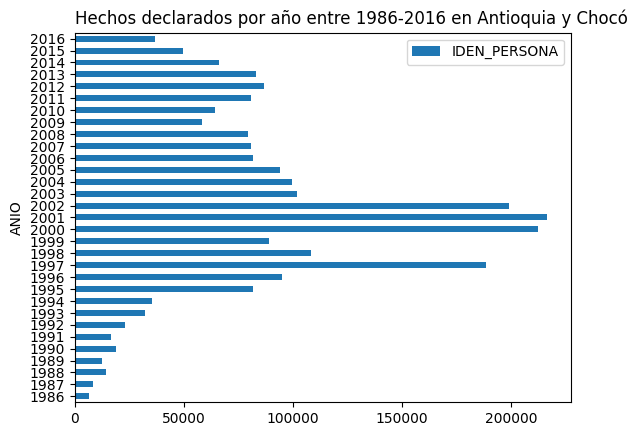

In [21]:
#fig, ax = plt.subplots()
dfanio.plot(kind='barh',x='ANIO',y='IDEN_PERSONA')
plt.title('Hechos declarados por año entre 1986-2016 en Antioquia y Chocó', loc='left')

In [36]:
dfdisc = dfdisc.sort_values(by='IDEN_PERSONA', ascending=False)

([], [])

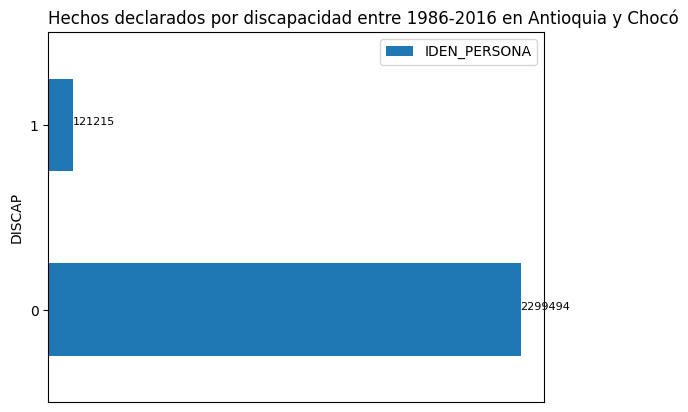

In [37]:
#fig, ax = plt.subplots()
dfdisc.plot(kind='barh',x='DISCAP',y='IDEN_PERSONA')
for index, value in enumerate(dfdisc['IDEN_PERSONA']):
    plt.text(value, index, str(value),fontsize=8)
plt.title('Hechos declarados por discapacidad entre 1986-2016 en Antioquia y Chocó', loc='left')
plt.xticks([])

In [38]:
dfcv = dfcv.sort_values(by='IDEN_PERSONA', ascending=True)

([], [])

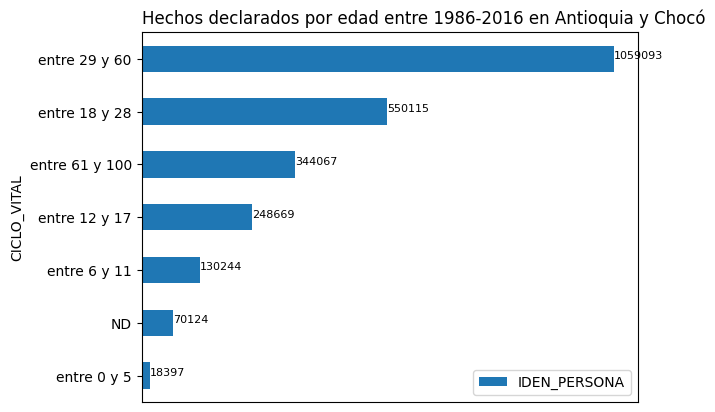

In [39]:
#fig, ax = plt.subplots()
dfcv.plot(kind='barh',x='CICLO_VITAL',y='IDEN_PERSONA')
for index, value in enumerate(dfcv['IDEN_PERSONA']):
    plt.text(value, index, str(value),fontsize=8)
plt.title('Hechos declarados por edad entre 1986-2016 en Antioquia y Chocó', loc='left')
plt.xticks([])

In [40]:
dfgen = dfgen.sort_values(by='IDEN_PERSONA', ascending=True)

([], [])

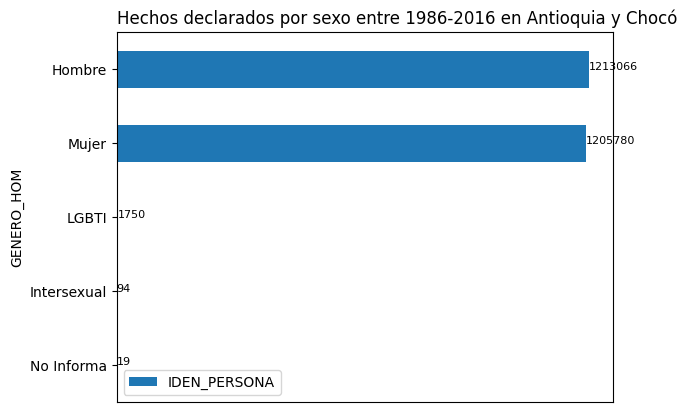

In [41]:
#fig, ax = plt.subplots()
dfgen.plot(kind='barh',x='GENERO_HOM',y='IDEN_PERSONA')
for index, value in enumerate(dfgen['IDEN_PERSONA']):
    plt.text(value, index, str(value),fontsize=8)
plt.title('Hechos declarados por sexo entre 1986-2016 en Antioquia y Chocó', loc='left')
plt.xticks([])

In [42]:
dfhv = dfhv.sort_values(by='IDEN_PERSONA', ascending=True)

([], [])

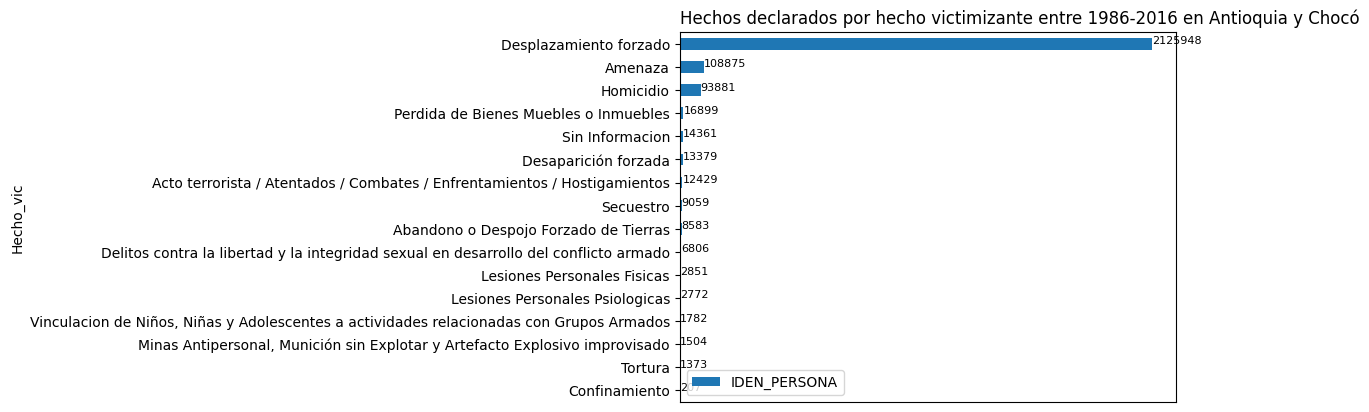

In [43]:
#fig, ax = plt.subplots()
dfhv.plot(kind='barh',x='Hecho_vic',y='IDEN_PERSONA')
for index, value in enumerate(dfhv['IDEN_PERSONA']):
    plt.text(value, index, str(value),fontsize=8)
plt.title('Hechos declarados por hecho victimizante entre 1986-2016 en Antioquia y Chocó', loc='left')
plt.xticks([])

In [44]:
dfet = dfet.sort_values(by='IDEN_PERSONA', ascending=True)

([], [])

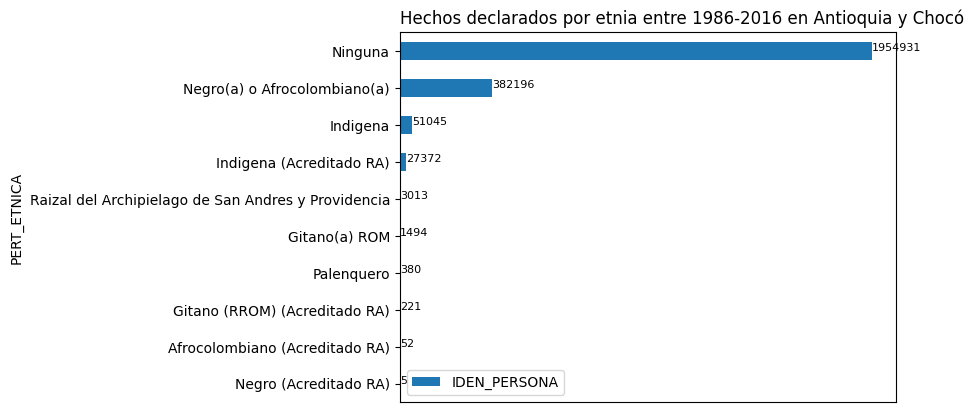

In [45]:
#fig, ax = plt.subplots()
dfet.plot(kind='barh',x='PERT_ETNICA',y='IDEN_PERSONA')
for index, value in enumerate(dfet['IDEN_PERSONA']):
    plt.text(value, index, str(value),fontsize=8)
plt.title('Hechos declarados por etnia entre 1986-2016 en Antioquia y Chocó', loc='left')
plt.xticks([])

In [46]:
dfpr = dfpr.sort_values(by='IDEN_PERSONA', ascending=True)

([], [])

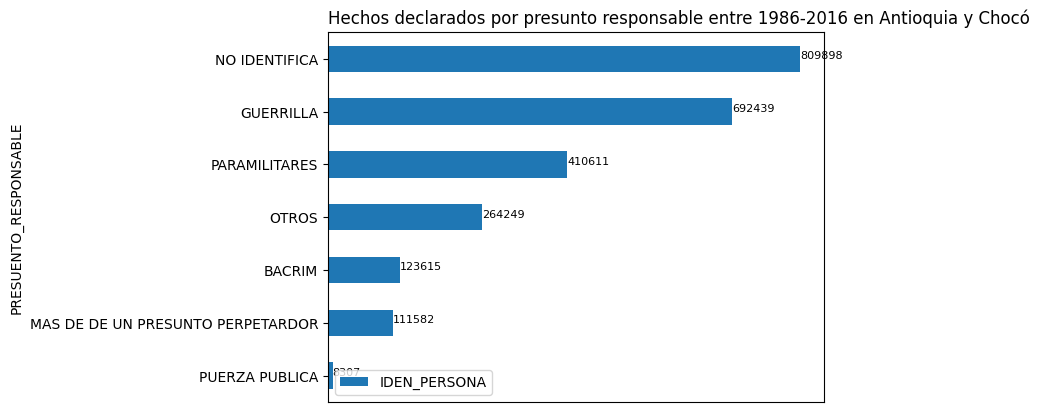

In [47]:
#fig, ax = plt.subplots()
dfpr.plot(kind='barh',x='PRESUENTO_RESPONSABLE',y='IDEN_PERSONA')
for index, value in enumerate(dfpr['IDEN_PERSONA']):
    plt.text(value, index, str(value),fontsize=8)
plt.title('Hechos declarados por presunto responsable entre 1986-2016 en Antioquia y Chocó', loc='left')
plt.xticks([])

In [48]:
dfmo = dfmo.sort_values(by='IDEN_PERSONA', ascending=True)

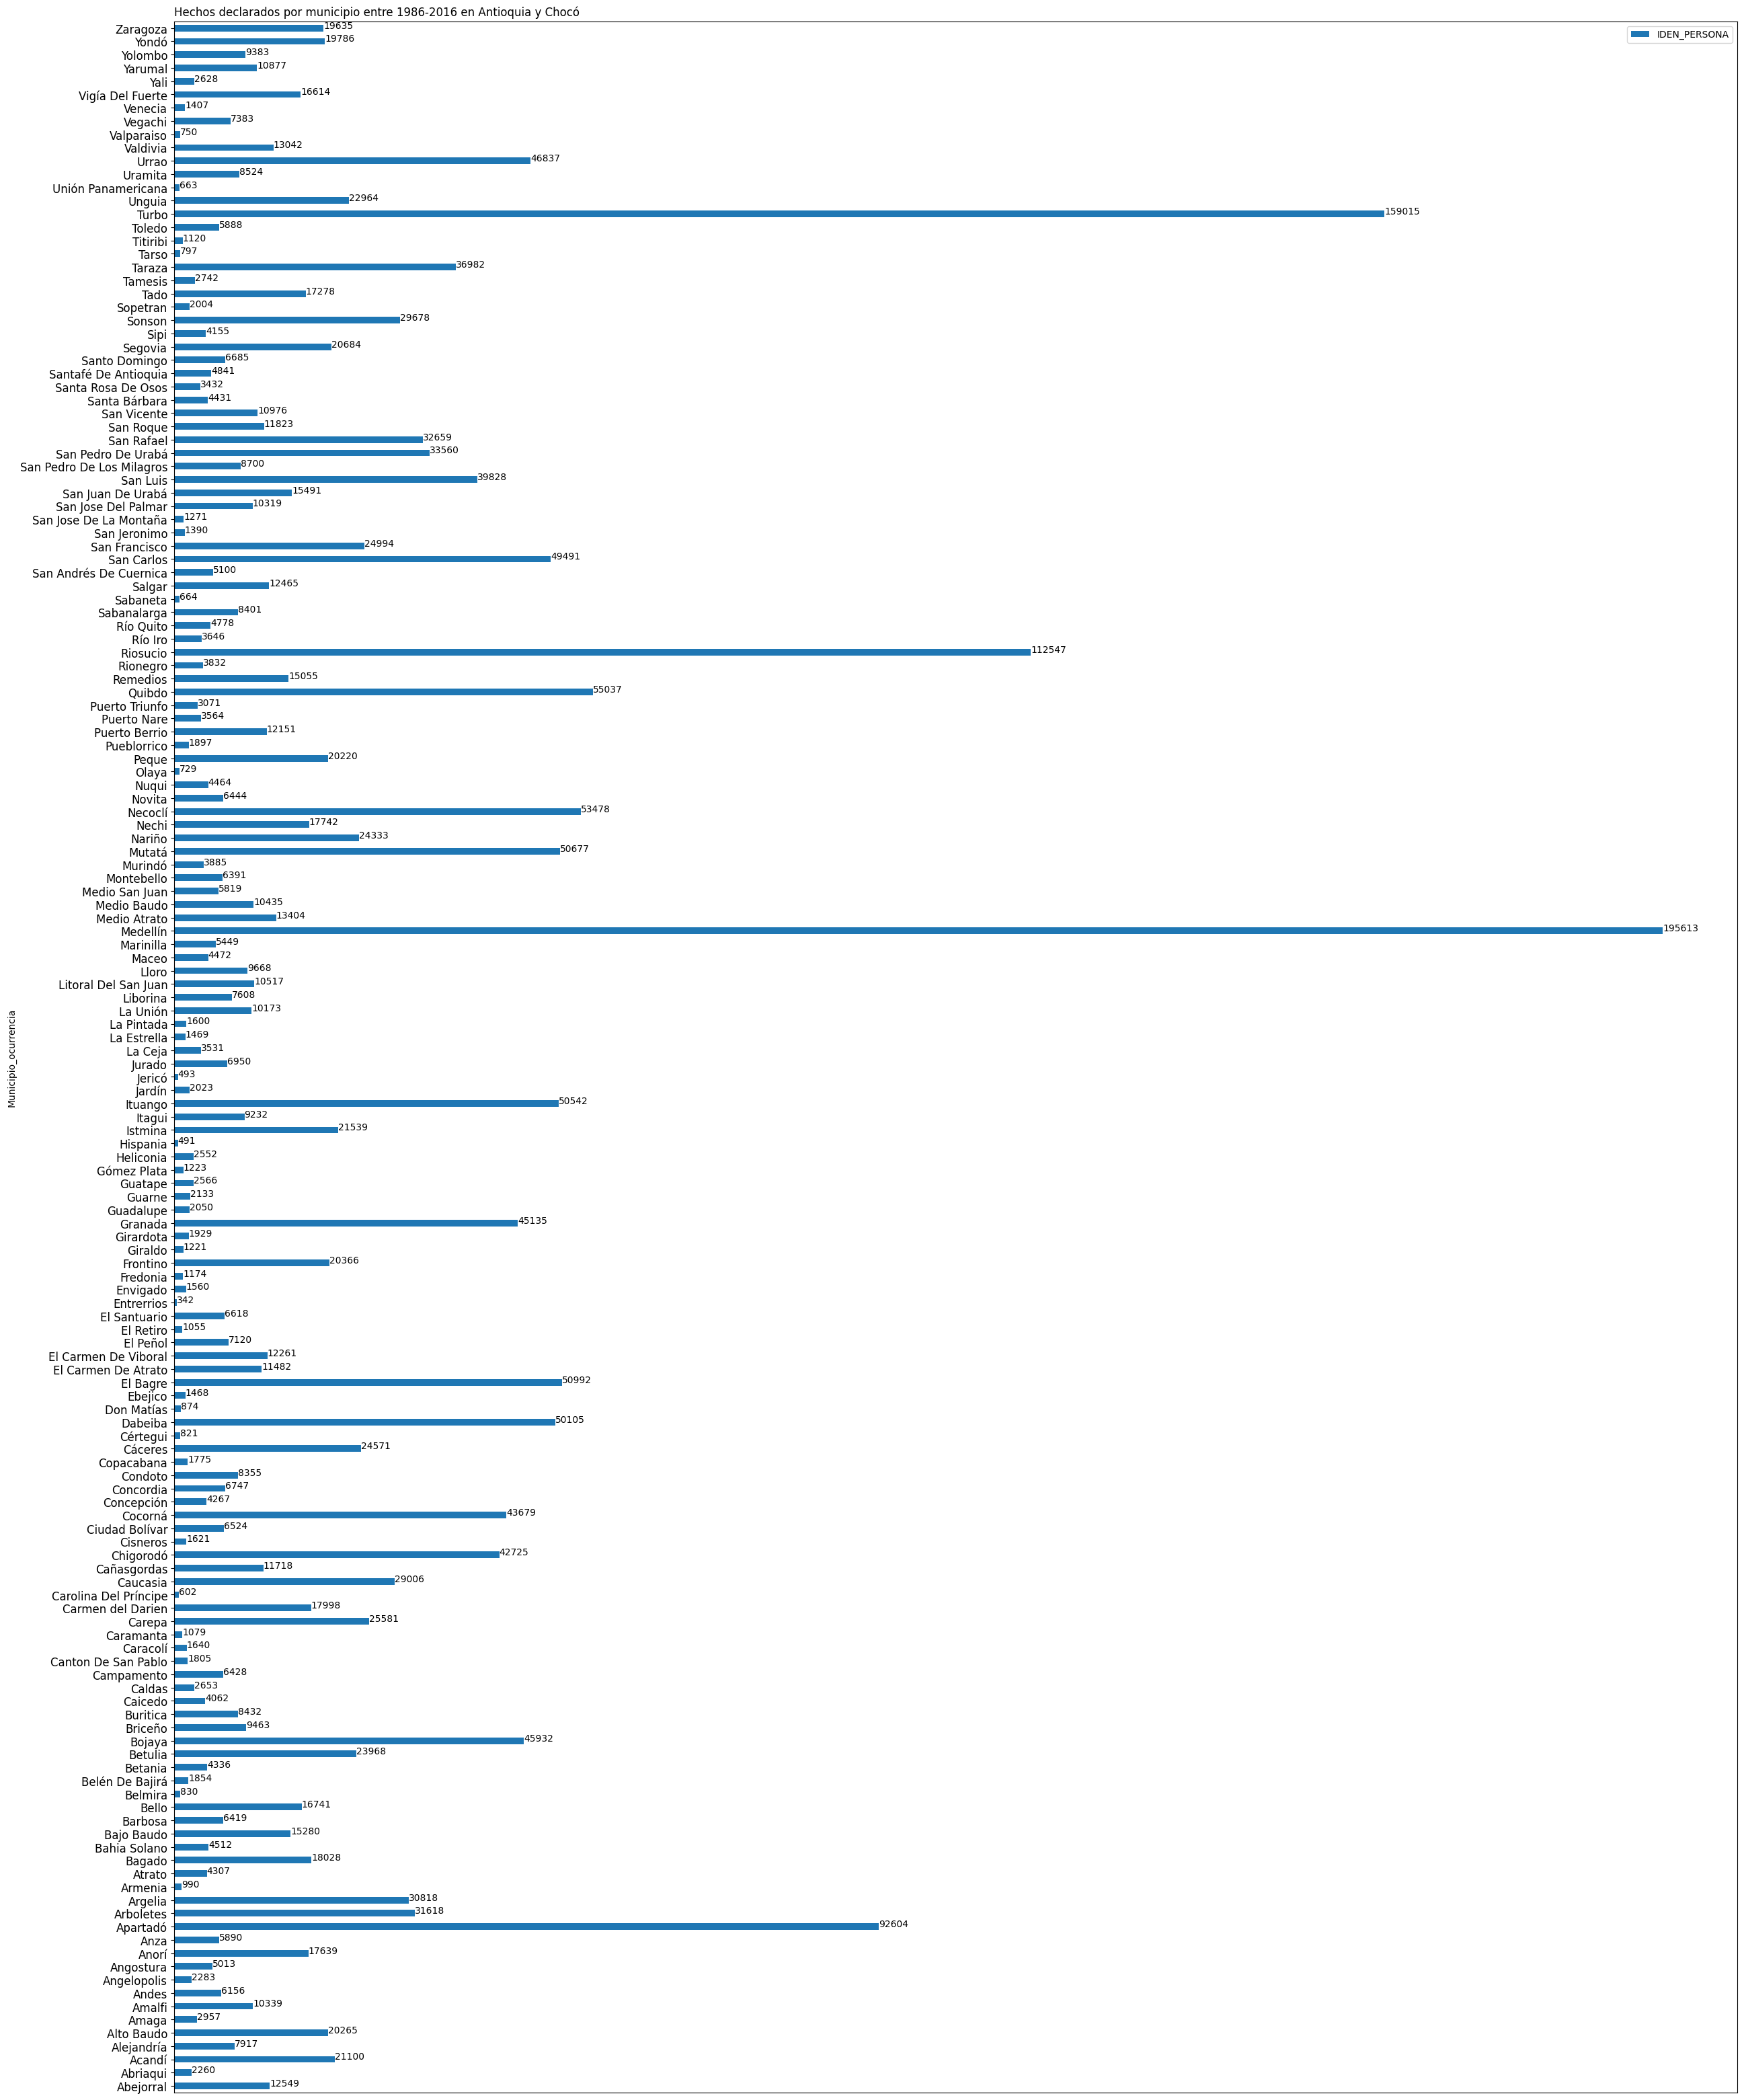

In [22]:
fig, ax = plt.subplots(figsize=(30, 40))  # Adjust the width and height as needed
dfmo.plot(kind='barh', x='Municipio_ocurrencia', y='IDEN_PERSONA', ax=ax)
for index, value in enumerate(dfmo['IDEN_PERSONA']):
    ax.text(value, index, str(value), fontsize=10)  # Adjust the font size of the text
ax.set_yticklabels(dfmo['Municipio_ocurrencia'], fontsize=12)  # Adjust the font size of y tick labels
ax.set_xticks([])  # Hide x ticks
plt.title('Hechos declarados por municipio entre 1986-2016 en Antioquia y Chocó',loc='left')
plt.show()

In [39]:
dfmo = dfmo.set_index('Municipio_ocurrencia')

In [51]:
dfmo.iplot()



In [58]:
df.tail()

RADICADO  ID_SINIESTRO  PROGRAMA  IDEN_PERSONA  PARAM_HECHO  \
2797117    192691             0         2       1179465            5   
2797118    204407             0         2       1139813            5   
2797119    108559             0         2        648554            5   
2797120    238832             0         2       1934867            5   
2797121     57584             0         2       1346509            5   

                      Hecho_vic F_OCURRENCIA_HECHO  DANE_OCURRENCIA  \
2797117  Desplazamiento forzado         1997-02-09             5837   
2797118  Desplazamiento forzado         1995-04-10             5490   
2797119  Desplazamiento forzado         2003-01-25             5649   
2797120  Desplazamiento forzado         2001-01-01             5036   
2797121  Desplazamiento forzado         2002-05-19            27099   

        Departamento_ocurrencia Municipio_ocurrencia  ... TIPO_DESPLAZAMIENTO  \
2797117               Antioquia                Turbo  ...              Masivo   
2797118               Antioquia              Necoclí  ...              Masivo   
2797119               Antioquia           San Carlos  ...          Individual   
2797120               Antioquia          Angelopolis  ...          Individual   
2797121                   Chocó               Bojaya  ...              Masivo   

         PRESUENTO_RESPONSABLE TIPO_VICTIMA GENERO_HOM DISCAP     CICLO_VITAL  \
2797117          PARAMILITARES      DIRECTA      Mujer      0   entre 29 y 60   
2797118          NO IDENTIFICA      DIRECTA      Mujer      0  entre 61 y 100   
2797119              GUERRILLA      DIRECTA      Mujer      0   entre 29 y 60   
2797120          NO IDENTIFICA      DIRECTA      Mujer      0   entre 18 y 28   
2797121          NO IDENTIFICA      DIRECTA      Mujer      0   entre 29 y 60   

        PERT_ETNICA ANIODECLA  ANIO SUMA  
2797117     Ninguna    2007.0  1997    1  
2797118     Ninguna    2007.0  1995    1  
2797119     Ninguna    2003.0  2003    1  
2797120     Ninguna    2009.0  2001    1  
2797121     Ninguna    2002.0  2002    1  

[5 rows x 24 columns]

In [73]:
dfdia = df.groupby('F_OCURRENCIA_HECHO').agg({'IDEN_PERSONA': pd.Series.nunique}).reset_index()
# Rename columns for clarity if desired
dfdia.columns = ['F_OCURRENCIA_HECHO', 'UNIQUE_IDEN_PERSONA_COUNT']
fig = px.line(dfdia, x='F_OCURRENCIA_HECHO', y='UNIQUE_IDEN_PERSONA_COUNT',
              title='Numero de hechos por dia entre 1986 a 2016 en los Departamentos de Antioquia y Choco')

# Show the plot
fig.show()

In [74]:
hvaniodf = df.pivot_table(index='F_OCURRENCIA_HECHO', columns='PRESUENTO_RESPONSABLE', 
                          values='SUMA', aggfunc=pd.Series.sum)

In [80]:
# Reset the index to make 'F_OCURRENCIA_HECHO' a column again
hvaniodf.reset_index(inplace=True)

# Rename the index name if desired
hvaniodf.index.name = None

# Reset column names for clarity
hvaniodf.columns.name = None

# Display the transformed DataFrame
print(hvaniodf)


       index F_OCURRENCIA_HECHO  BACRIM  GUERRILLA  \
0          0         1986-01-01     NaN      240.0   
1          1         1986-01-02     NaN        3.0   
2          2         1986-01-03     NaN       16.0   
3          3         1986-01-04     NaN        4.0   
4          4         1986-01-05     NaN       11.0   
...      ...                ...     ...        ...   
11314  11314         2016-12-27    37.0       14.0   
11315  11315         2016-12-28    56.0       28.0   
11316  11316         2016-12-29    38.0        8.0   
11317  11317         2016-12-30    21.0       25.0   
11318  11318         2016-12-31    32.0        6.0   

       MAS DE DE UN PRESUNTO PERPETARDOR  NO IDENTIFICA  OTROS  PARAMILITARES  \
0                                   13.0          139.0    8.0           48.0   
1                                    NaN            6.0    NaN            NaN   
2                                    NaN            5.0    NaN           11.0   
3                          

In [83]:
px.line(hvaniodf, x='F_OCURRENCIA_HECHO', y=['GUERRILLA','PARAMILITARES','PUERZA PUBLICA'])

### Datos en los municipios del caso 007

In [ ]:
lis = key.DANE

In [ ]:
hv007 = df['DANE_OCURRENCIA'].isin(lis)
hv007 = df[hv007]
hv007 = hv007.groupby(['Hecho_vic']).agg({'IDEN_PERSONA': 'count'}).reset_index()
hv007 = hv007.sort_values(by='IDEN_PERSONA', ascending=True)
#fig, ax = plt.subplots()
hv007.plot(kind='barh',x='Hecho_vic',y='IDEN_PERSONA',color='red')
for index, value in enumerate(hv007['IDEN_PERSONA']):
    plt.text(value, index, str(value),fontsize=8)
plt.title('Hechos declarados por hecho victimizante entre 1986-2016 en municipios caso 07', loc='left')
plt.xticks([])

In [ ]:
pr007 = df['DANE_OCURRENCIA'].isin(lis)
pr007 = df[pr007]
pr007 = pr007.groupby(['PRESUENTO_RESPONSABLE']).agg({'IDEN_PERSONA': 'count'}).reset_index()
pr007 = pr007.sort_values(by='IDEN_PERSONA', ascending=True)
#fig, ax = plt.subplots()
pr007.plot(kind='barh',x='PRESUENTO_RESPONSABLE',y='IDEN_PERSONA',color='red')
for index, value in enumerate(pr007['IDEN_PERSONA']):
    plt.text(value, index, str(value),fontsize=8)
plt.title('Hechos declarados por presunto responsable entre 1986-2016 en municipios caso 07', loc='left')
plt.xticks([])

In [ ]:
sx007 = df['DANE_OCURRENCIA'].isin(lis)
sx007 = df[sx007]
sx007 = sx007.groupby(['GENERO_HOM']).agg({'IDEN_PERSONA': 'count'}).reset_index()
sx007 = sx007.sort_values(by='IDEN_PERSONA', ascending=True)
#fig, ax = plt.subplots()
sx007.plot(kind='barh',x='GENERO_HOM',y='IDEN_PERSONA',color='red')
for index, value in enumerate(sx007['IDEN_PERSONA']):
    plt.text(value, index, str(value),fontsize=8)
plt.title('Hechos declarados por sexo entre 1986-2016 en municipios caso 07', loc='left')
plt.xticks([])

In [ ]:
cv007 = df['DANE_OCURRENCIA'].isin(lis)
cv007 = df[cv007]
cv007 = cv007.groupby(['CICLO_VITAL']).agg({'IDEN_PERSONA': 'count'}).reset_index()
cv007 = cv007.sort_values(by='IDEN_PERSONA', ascending=True)
#fig, ax = plt.subplots()
cv007.plot(kind='barh',x='CICLO_VITAL',y='IDEN_PERSONA',color='red')
for index, value in enumerate(cv007['IDEN_PERSONA']):
    plt.text(value, index, str(value),fontsize=8)
plt.title('Hechos declarados por sexo entre 1986-2016 en municipios caso 07', loc='left')
plt.xticks([])

In [ ]:
et007 = df['DANE_OCURRENCIA'].isin(lis)
et007 = df[et007]
et007 = et007.groupby(['PERT_ETNICA']).agg({'IDEN_PERSONA': 'count'}).reset_index()
et007 = et007.sort_values(by='IDEN_PERSONA', ascending=True)
#fig, ax = plt.subplots()
et007.plot(kind='barh',x='PERT_ETNICA',color='red')
for index, value in enumerate(et007['IDEN_PERSONA']):
    plt.text(value, index, str(value),fontsize=8)
plt.title('Hechos declarados por etnia entre 1986-2016 en municipios caso 07', loc='left')
plt.xticks([])

In [ ]:
anio007 = df['DANE_OCURRENCIA'].isin(lis)
anio007 = df[anio007]
anio007 = anio007.groupby(['ANIO']).agg({'IDEN_PERSONA': 'count'}).reset_index()
#fig, ax = plt.subplots()
anio007.plot(kind='barh',x='ANIO',color='red')
for index, value in enumerate(anio007['IDEN_PERSONA']):
    plt.text(value, index, str(value),fontsize=8)
plt.title('Hechos declarados por año entre 1986-2016 en municipios caso 07', loc='left')
plt.xticks([])

In [ ]:
mo007 = df['DANE_OCURRENCIA'].isin(lis)
mo007 = df[mo007]
mo007 = mo007.groupby(['Municipio_ocurrencia']).agg({'IDEN_PERSONA': 'count'}).reset_index()
mo007 = mo007.sort_values(by='IDEN_PERSONA', ascending=True)
#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(30, 12))  # Adjust the width and height as needed
mo007.plot(kind='barh', x='Municipio_ocurrencia', y='IDEN_PERSONA', color='red',ax=ax)
for index, value in enumerate(mo007['IDEN_PERSONA']):
    ax.text(value, index, str(value), fontsize=10)  # Adjust the font size of the text
ax.set_yticklabels(mo007['Municipio_ocurrencia'], fontsize=12)  # Adjust the font size of y tick labels
ax.set_xticks([])  # Hide x ticks
plt.title('Hechos declarados por municipio entre 1986-2016 en municipios caso 07',loc='left')
plt.show()

In [ ]:
disc007 = df['DANE_OCURRENCIA'].isin(lis)
disc007 = df[disc007]
disc007 = disc007.groupby(['DISCAP']).agg({'IDEN_PERSONA': 'count'}).reset_index()
disc007 = disc007.sort_values(by='IDEN_PERSONA', ascending=False)
#fig, ax = plt.subplots()
disc007.plot(kind='barh',x='DISCAP',color='red')
for index, value in enumerate(disc007['IDEN_PERSONA']):
    plt.text(value, index, str(value),fontsize=8)
plt.title('Hechos declarados por discapacidad entre 1986-2016 en municipios caso 07', loc='left')
plt.xticks([])

### Otras variables

In [ ]:
# Pivot the DataFrame to prepare for heatmap
vis_hv = hv.pivot_table(index='Hecho_vic', columns='ANIO', aggfunc={'IDEN_PERSONA': 'sum'})

# Plot heatmap using seaborn
plt.figure(figsize=(37, 14))
sns.heatmap(vis_hv, annot=True, fmt='g', cmap='coolwarm')
plt.title('Número de hechos victimizantes por año', fontsize = 15)
plt.xlabel('Año', fontsize = 15)
plt.ylabel('Hecho victimizante', fontsize = 15)
#plt.yticks(rotation=90)
plt.show()